In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint, norm, kstest, cauchy, laplace, gamma, lognorm
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
dataset = pd.read_csv('1moskow_1_rooms_fist_floors(1-3)_Brick.csv')
print(dataset.head)

<bound method NDFrame.head of          price        date      time    geo_lat    geo_lon  region  \
0      4200000  2018-06-13  11:05:52  55.575248  38.253133      81   
1      2900000  2018-07-12  12:52:00  56.334567  38.142952      81   
2      2950000  2018-08-31  16:42:58  55.859248  37.126637      81   
3      2050000  2018-09-08  00:59:22  56.079639  37.930872      81   
4      4600000  2018-09-08  02:12:55  55.681777  37.281888      81   
...        ...         ...       ...        ...        ...     ...   
30737  6450000  2021-05-01  17:56:41  55.825178  37.117538      81   
30738  3600000  2021-05-01  18:02:42  55.883449  37.538916       3   
30739  1600000  2021-05-01  18:09:41  55.333894  38.891093      81   
30740  7158000  2021-05-01  19:06:42  55.771246  37.683033       3   
30741  3800000  2021-05-01  19:06:42  55.540449  37.074465      81   

       building_type  level  levels  rooms  area  kitchen_area  object_type  
0                  3      3      17      1  43.0   

In [53]:
price = np.array(dataset[['price']])
price = price.ravel()

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 44.50it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,9.718521e-16,5.127834e+03,-162837.075533,inf,0.091052,6.809850e-28
expon,2.035780e-15,1.722844e+04,-160024.280593,inf,0.306451,1.283480e-317
norm,1.799857e-14,1.160910e+05,-151733.793791,inf,0.366917,0.000000e+00
uniform,2.975688e-14,4.021697e+03,-149821.263750,inf,0.975621,0.000000e+00
gamma,3.011281e-14,inf,-149767.789222,NaN,0.999737,0.000000e+00


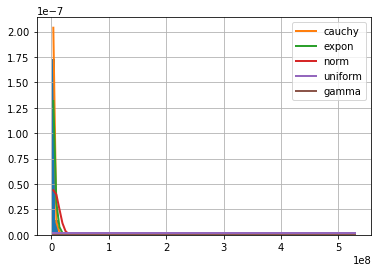

In [62]:
f = Fitter(price,
           distributions=["uniform", "expon", "norm", "gamma", "cauchy"])
f.fit()
f.summary()

In [63]:
f.get_best(method = 'sumsquare_error')

{'cauchy': {'loc': 4179335.842967552, 'scale': 829853.6254066597}}

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  9.86it/s]
weibull was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
laplace,1.434039e-15,4.409042e+04,-1.613571e+05,inf,0.064776,2.547874e-14
beta,3.439516e-15,5.221451e+04,-1.580128e+05,inf,0.110383,8.002853e-41
pareto,1.043934e-14,4.589924e+03,-1.537976e+05,inf,0.431381,0.000000e+00
lognorm,1.272209e-14,1.773173e+04,-1.530454e+05,inf,0.049617,1.407410e-08
weibull,inf,inf,inf,inf,NaN,NaN


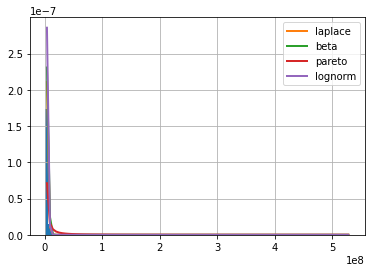

In [64]:
f = Fitter(price,
           distributions=["pareto", "laplace","lognorm", "weibull", "beta"])
f.fit()
f.summary()

In [65]:
f.get_best(method = 'sumsquare_error')

{'laplace': {'loc': 4194167.0, 'scale': 1271846.5086750789}}

Fitting 2 distributions: 100%|███████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 51.85it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,9.718521e-16,5127.834304,-162837.075533,inf,0.091052,6.809850e-28
laplace,1.434039e-15,44090.418556,-161357.142032,inf,0.064776,2.547874e-14


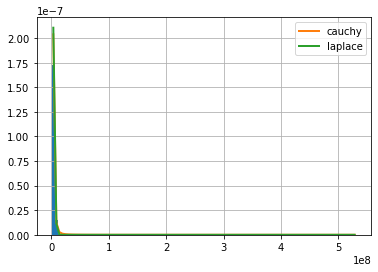

In [67]:
f = Fitter(price,
           distributions=["cauchy", "laplace"])
f.fit()
f.summary()

In [68]:
f.get_best(method = 'sumsquare_error')

{'cauchy': {'loc': 4179335.842967552, 'scale': 829853.6254066597}}

In [3]:
dataset = pd.read_csv('1moskow_1_rooms_fist_floors(1-3)_Monolithic.csv')
print(dataset.head)

<bound method NDFrame.head of           price        date      time    geo_lat    geo_lon  region  \
0       4704280  2018-03-04  12:35:25  55.621097  37.431002       3   
1       3590000  2018-06-04  12:36:14  55.949321  37.180294      81   
2       5158890  2018-08-13  10:43:29  55.748595  37.925296      81   
3       6950000  2018-08-30  16:43:06  55.879264  37.313741      81   
4       8686800  2018-09-08  00:45:12  55.673715  37.745559       3   
...         ...         ...       ...        ...        ...     ...   
25250   7964222  2021-05-01  18:01:46  55.572432  37.475523       3   
25251  13881660  2021-05-01  18:18:41  55.744218  37.407501       3   
25252   4260000  2021-05-01  18:55:42  55.584586  38.226547      81   
25253   6890000  2021-05-01  19:03:41  55.471063  37.545867      81   
25254   8000000  2021-05-01  19:34:40  55.644999  37.860946      81   

       building_type  level  levels  rooms  area  kitchen_area  object_type  
0                  2      1      25    

In [4]:
dataset = pd.read_csv('1moskow_1_rooms_fist_floors(1-3)_Pannel.csv')
print(dataset.head)

<bound method NDFrame.head of          price        date      time    geo_lat    geo_lon  region  \
0      5500000  2018-09-08  00:56:00  55.816377  37.965619      81   
1      1950000  2018-09-08  01:56:19  54.921458  37.418644      81   
2      3150000  2018-09-08  02:17:05  55.791461  37.977087      81   
3      2800000  2018-09-08  07:39:04  54.943634  37.399390      81   
4      5100000  2018-09-08  10:06:14  55.596320  37.614500       3   
...        ...         ...       ...        ...        ...     ...   
32004  8100000  2021-05-01  17:20:47  55.746134  37.703171       3   
32005  6800000  2021-05-01  18:11:40  55.626145  37.309440       3   
32006  9251520  2021-05-01  18:37:49  55.700399  37.960624      81   
32007  6250000  2021-05-01  18:53:43  55.571951  37.618659      81   
32008  3870000  2021-05-01  18:53:45  55.925952  37.999887      81   

       building_type  level  levels  rooms  area  kitchen_area  object_type  
0                  1      3      16      1  55.0   

In [6]:
dataset = pd.read_csv('1moskow_1_rooms_middle_floors(4-5)_Brick.csv')
print(dataset.head)

<bound method NDFrame.head of           price        date      time    geo_lat    geo_lon  region  \
0       2500000  2018-04-14  15:29:34  54.886223  38.082710      81   
1       2200000  2018-05-16  11:09:14  54.893461  38.078939      81   
2       2750000  2018-06-05  13:41:12  55.740321  38.022801      81   
3       2650000  2018-09-01  18:12:19  55.963407  37.912638      81   
4       2400000  2018-09-08  06:48:37  56.750867  37.196887      81   
...         ...         ...       ...        ...        ...     ...   
16346   2200000  2021-05-01  16:27:49  56.515746  38.091344      81   
16347   6000000  2021-05-01  16:42:44  55.642133  37.857045      81   
16348   9999999  2021-05-01  17:26:43  55.873771  37.547925       3   
16349  12300000  2021-05-01  19:41:38  55.788469  37.557565       3   
16350   3600000  2021-05-01  19:45:41  56.264430  38.212614      81   

       building_type  level  levels  rooms  area  kitchen_area  object_type  
0                  3      4       9    

In [7]:
dataset = pd.read_csv('1moskow_1_rooms_middle_floors(4-5)_Monolithic.csv')
print(dataset.head)

<bound method NDFrame.head of          price        date      time    geo_lat    geo_lon  region  \
0      3999000  2018-09-08  03:28:42  55.918782  37.748277      81   
1      5290320  2018-09-08  07:45:59  55.671340  37.416133       3   
2      5124540  2018-09-08  07:46:02  55.671340  37.416133       3   
3      5680120  2018-09-08  07:46:09  55.671340  37.416133       3   
4      3521440  2018-09-08  07:46:10  55.671340  37.416133       3   
...        ...         ...       ...        ...        ...     ...   
17676  9036390  2021-05-01  16:47:36  55.886918  37.534136       3   
17677  7200000  2021-05-01  17:13:45  55.630798  37.853825      81   
17678  5493080  2021-05-01  18:37:47  55.796389  37.938283      81   
17679  6350000  2021-05-01  18:41:37  55.699030  37.957773      81   
17680  7295370  2021-05-01  18:53:48  55.882031  37.501837       3   

       building_type  level  levels  rooms   area  kitchen_area  object_type  
0                  2      4      16      1  34.00 

In [8]:
dataset = pd.read_csv('1moskow_1_rooms_middle_floors(4-5)_Pannel.csv')
print(dataset.head)

<bound method NDFrame.head of           price        date      time    geo_lat    geo_lon  region  \
0       3300000  2018-03-02  21:18:42  55.908253  37.726448      81   
1       6350000  2018-09-08  00:28:01  55.711580  37.395611       3   
2       3500000  2018-09-08  03:09:48  55.594713  38.250355      81   
3       6000000  2018-09-08  05:08:11  55.540730  37.489967       3   
4       1600000  2018-09-08  07:42:00  55.781347  38.668630      81   
...         ...         ...       ...        ...        ...     ...   
19502   7547300  2021-05-01  16:44:59  55.542958  37.479919       3   
19503   6625920  2021-05-01  16:54:46  55.545913  37.590000      81   
19504   5400000  2021-05-01  17:05:45  55.662410  37.922082      81   
19505  12500000  2021-05-01  17:23:42  55.668191  37.763951       3   
19506   9388470  2021-05-01  18:36:42  55.805422  37.754179       3   

       building_type  level  levels  rooms  area  kitchen_area  object_type  
0                  1      4       5    

In [10]:
dataset = pd.read_csv('1moskow_1_rooms_upper_floors(6+)_Brick.csv')
print(dataset.head)

<bound method NDFrame.head of          price        date      time    geo_lat    geo_lon  region  \
0      3750000  2018-08-13  20:00:52  55.577467  38.205256      81   
1      4080000  2018-09-08  03:57:23  55.572935  38.254954      81   
2      4080000  2018-09-08  04:45:31  55.575290  38.253220      81   
3      3700000  2018-09-08  07:06:02  55.594620  38.250268      81   
4      4200000  2018-09-08  07:34:16  55.638588  37.220860      81   
...        ...         ...       ...        ...        ...     ...   
19182  7550000  2021-05-01  15:53:47  56.003377  37.852641      81   
19183  6300000  2021-05-01  16:16:54  56.016597  37.856263      81   
19184  1400000  2021-05-01  16:35:43  55.733273  38.957517      81   
19185  8650000  2021-05-01  16:43:49  55.653853  37.407079       3   
19186  8900000  2021-05-01  18:12:39  55.691963  37.620833       3   

       building_type  level  levels  rooms  area  kitchen_area  object_type  
0                  3      6      10      1  42.5   

In [11]:
dataset = pd.read_csv('1moskow_1_rooms_upper_floors(6+)_Monolithic.csv')
print(dataset.head)

<bound method NDFrame.head of           price        date      time    geo_lat    geo_lon  region  \
0       4279770  2018-03-06  18:40:08  55.781715  37.856656      81   
1       4600000  2018-04-02  15:09:38  55.707834  37.959639      81   
2       3690000  2018-08-13  23:47:42  55.577467  38.205256      81   
3       5100000  2018-09-08  01:55:05  55.684681  37.901314      81   
4       4250000  2018-09-08  07:13:50  56.006301  37.852931      81   
...         ...         ...       ...        ...        ...     ...   
95128  31900000  2021-05-01  20:06:39  55.722163  37.618498       3   
95129  12423200  2021-05-01  20:09:02  55.805465  37.714470       3   
95130  12039040  2021-05-01  20:09:08  55.841415  37.489624       3   
95131  12645450  2021-05-01  20:10:02  55.841415  37.489624       3   
95132  12850000  2021-05-01  20:13:47  55.701280  37.642654       3   

       building_type  level  levels  rooms  area  kitchen_area  object_type  
0                  2      7      15    

In [12]:
dataset = pd.read_csv('1moskow_1_rooms_upper_floors(6+)_Pannel.csv')
print(dataset.head)

<bound method NDFrame.head of           price        date      time    geo_lat    geo_lon  region  \
0       4291950  2018-03-06  18:37:27  55.913950  37.707712      81   
1      11500000  2018-04-18  21:52:41  55.701330  37.507412       3   
2       5750000  2018-06-20  15:52:13  55.704428  37.766989       3   
3       4235680  2018-08-04  07:43:29  55.696845  37.907325      81   
4       4368880  2018-08-27  13:09:09  55.704271  37.942044       3   
...         ...         ...       ...        ...        ...     ...   
61288   5350620  2021-05-01  18:24:43  55.783287  37.257977      81   
61289   9000000  2021-05-01  18:51:45  55.640589  37.770573       3   
61290   6077980  2021-05-01  18:54:45  55.627693  37.930237      81   
61291   6665190  2021-05-01  19:00:46  55.545913  37.590000      81   
61292  10295730  2021-05-01  20:11:07  55.848186  37.561906       3   

       building_type  level  levels  rooms  area  kitchen_area  object_type  
0                  1     10      14    

In [15]:
dataset = pd.read_csv('1moskow_2-3_rooms_fist_floors(1-3)_Brick.csv')
print(dataset.head)

<bound method NDFrame.head of           price        date      time    geo_lat    geo_lon  region  \
0       5300000  2018-03-30  12:08:09  54.885280  38.080196      81   
1       1500000  2018-06-18  13:01:53  54.888697  38.605205      81   
2       6990000  2018-07-17  12:50:34  55.723813  37.434764       3   
3       3100000  2018-08-03  12:13:13  56.306255  38.150266      81   
4       2600000  2018-09-08  00:52:53  55.714731  38.210455      81   
...         ...         ...       ...        ...        ...     ...   
59987   5000000  2021-05-01  18:01:45  56.182744  36.995182      81   
59988  14900000  2021-05-01  18:05:44  55.760804  37.801265       3   
59989  10700000  2021-05-01  18:45:43  55.425136  37.520446      81   
59990   5980000  2021-05-01  19:12:46  56.013130  37.461025      81   
59991   3850000  2021-05-01  19:45:36  55.625307  38.125921      81   

       building_type  level  levels  rooms  area  kitchen_area  object_type  
0                  3      2       5    

In [16]:
dataset = pd.read_csv('1moskow_2-3_rooms_fist_floors(1-3)_Monolithic.csv')
print(dataset.head)

<bound method NDFrame.head of           price        date      time    geo_lat    geo_lon  region  \
0       8677850  2018-08-04  09:37:24  55.915306  37.720106      81   
1      10500000  2018-09-08  00:10:33  55.567722  37.444569       3   
2      13293000  2018-09-08  01:23:56  55.790968  37.475395       3   
3       7544000  2018-09-08  03:40:34  55.886839  37.180513      81   
4       2500000  2018-09-08  06:07:44  55.910634  38.050704      81   
...         ...         ...       ...        ...        ...     ...   
36031  14501640  2021-05-01  18:50:46  55.572883  37.513689       3   
36032  12922650  2021-05-01  19:18:45  55.633950  37.425432       3   
36033  10650000  2021-05-01  20:06:38  55.668320  37.858000      81   
36034  13753150  2021-05-01  20:10:31  55.815317  37.426025       3   
36035  23319120  2021-05-01  20:11:03  55.853728  37.620905       3   

       building_type  level  levels  rooms   area  kitchen_area  object_type  
0                  2      2      14   

In [17]:
dataset = pd.read_csv('1moskow_2-3_rooms_fist_floors(1-3)_Pannel.csv')
print(dataset.head)

<bound method NDFrame.head of           price        date      time    geo_lat    geo_lon  region  \
0       4550000  2018-05-16  11:32:28  55.958999  38.035054      81   
1       5399940  2018-08-04  07:39:22  55.702945  37.887114      81   
2       6800000  2018-08-16  12:27:34  55.683246  37.868902      81   
3       2500000  2018-08-27  13:02:23  55.764956  38.446071      81   
4       6217920  2018-08-30  12:52:35  55.704271  37.942044       3   
...         ...         ...       ...        ...        ...     ...   
59972   6300000  2021-05-01  17:58:41  55.534016  37.640237      81   
59973  11693700  2021-05-01  17:59:46  56.005770  37.856277      81   
59974   8990000  2021-05-01  18:06:46  55.994655  37.169959       3   
59975   7300000  2021-05-01  19:11:43  55.855996  37.128690      81   
59976   3050000  2021-05-01  19:32:48  55.797025  38.954105      81   

       building_type  level  levels  rooms  area  kitchen_area  object_type  
0                  1      2      16    

In [19]:
dataset = pd.read_csv('1moskow_2-3_rooms_middle_floors(4-5)_Brick.csv')
print(dataset.head)

<bound method NDFrame.head of           price        date      time    geo_lat    geo_lon  region  \
0       8650000  2018-02-27  12:04:54  55.683807  37.297405      81   
1       4250000  2018-04-18  21:46:21  55.577999  39.517491      81   
2       5300000  2018-06-13  10:40:59  55.579979  38.248528      81   
3       3750000  2018-08-18  07:39:01  55.411554  36.716229      81   
4       4100000  2018-09-08  07:51:03  56.006005  37.843842      81   
...         ...         ...       ...        ...        ...     ...   
31287   7100000  2021-05-01  18:06:45  55.153749  37.472367      81   
31288  56500000  2021-05-01  18:28:42  55.765712  37.602764       3   
31289   9500000  2021-05-01  19:02:39  55.723924  37.789206       3   
31290  23000000  2021-05-01  19:20:43  55.744409  37.632990       3   
31291   6400000  2021-05-01  20:13:41  55.904292  37.984368      81   

       building_type  level  levels  rooms  area  kitchen_area  object_type  
0                  3      5      24    

In [25]:
dataset = pd.read_csv('1moskow_2-3_rooms_middle_floors(4-5)_Monolithic.csv')
print(dataset.head)

<bound method NDFrame.head of           price        date      time    geo_lat    geo_lon  region  \
0       3150000  2018-09-01  12:58:41  55.802925  38.457947      81   
1      18974540  2018-09-08  01:23:38  55.790968  37.475395       3   
2       9424480  2018-09-08  07:45:57  55.671340  37.416133       3   
3       2900000  2018-09-08  10:13:05  55.353415  37.538695      81   
4       4550000  2018-09-08  11:22:42  55.980060  37.738575      81   
...         ...         ...       ...        ...        ...     ...   
24923  16489791  2021-05-01  19:10:46  55.572883  37.513689       3   
24924  18131850  2021-05-01  19:27:46  55.633950  37.425432       3   
24925  13114350  2021-05-01  20:08:18  55.722433  37.774865       3   
24926  17140700  2021-05-01  20:09:31  55.553900  37.553981       3   
24927  13403880  2021-05-01  20:11:11  55.860064  37.540592       3   

       building_type  level  levels  rooms  area  kitchen_area  object_type  
0                  2      4      17    

In [24]:
dataset = pd.read_csv('1moskow_2-3_rooms_middle_floors(4-5)_Pannel.csv')
print(dataset.head)

<bound method NDFrame.head of           price        date      time    geo_lat    geo_lon  region  \
0       6522650  2018-03-06  18:37:35  55.913950  37.707712      81   
1       8000000  2018-03-17  06:46:32  55.738876  37.825370       3   
2       2800000  2018-04-05  20:25:27  55.942876  37.976462      81   
3       2750000  2018-04-14  15:29:34  54.893745  38.075084      81   
4       2200000  2018-04-14  15:29:36  54.876962  38.155205      81   
...         ...         ...       ...        ...        ...     ...   
38236  13500000  2021-05-01  18:06:45  55.597150  37.591940       3   
38237   2650000  2021-05-01  18:19:45  55.488606  36.032603      81   
38238   5950000  2021-05-01  18:45:46  55.926326  37.817329      81   
38239   4800000  2021-05-01  19:43:37  55.240338  37.538503      81   
38240   2400000  2021-05-01  19:47:39  55.242160  37.280399      81   

       building_type  level  levels  rooms  area  kitchen_area  object_type  
0                  1      5      14    

In [23]:
dataset = pd.read_csv('1moskow_2-3_rooms_upper_floors(6+)_Brick.csv')
print(dataset.head)

<bound method NDFrame.head of           price        date      time    geo_lat    geo_lon  region  \
0       5450000  2018-03-01  17:42:43  55.918767  37.984642      81   
1       4400000  2018-04-14  15:29:37  54.886857  38.058376      81   
2      20900000  2018-05-01  13:33:09  55.730785  37.631424       3   
3       3468912  2018-05-29  23:50:20  55.450883  37.542070      81   
4      13825000  2018-06-07  08:59:31  55.888657  37.430370      81   
...         ...         ...       ...        ...        ...     ...   
30340   4300000  2021-05-01  17:04:41  54.840222  38.243922      81   
30341  10200000  2021-05-01  17:27:44  55.757850  37.835403       3   
30342   8300000  2021-05-01  17:28:44  55.888657  37.430370      81   
30343   9700000  2021-05-01  17:29:46  55.406746  37.812469      81   
30344   9300000  2021-05-01  18:18:42  55.655227  37.231308      81   

       building_type  level  levels  rooms   area  kitchen_area  object_type  
0                  3     13      14   

# Самый большой файл #

In [26]:
dataset = pd.read_csv('1moskow_2-3_rooms_upper_floors(6+)_Monolithic.csv')
print(dataset.head)

<bound method NDFrame.head of            price        date      time    geo_lat    geo_lon  region  \
0       10200000  2018-04-07  15:23:20  55.655307  37.614605       3   
1        5500000  2018-07-22  23:00:02  55.495187  37.554362       3   
2        6332000  2018-08-13  10:04:00  55.563338  37.851372      81   
3       15800000  2018-09-01  12:50:02  55.680793  37.484593       3   
4        9590400  2018-09-08  00:30:49  55.673715  37.745559       3   
...          ...         ...       ...        ...        ...     ...   
136022   7293900  2021-05-01  20:10:40  55.927587  37.728987      81   
136023  14648480  2021-05-01  20:11:09  55.861148  37.540870       3   
136024  15720696  2021-05-01  20:12:39  55.886918  37.534136       3   
136025  12503160  2021-05-01  20:14:01  55.841415  37.489624       3   
136026  13316200  2021-05-01  20:14:15  55.860240  37.540356       3   

        building_type  level  levels  rooms   area  kitchen_area  object_type  
0                   2    

In [69]:
price = np.array(dataset[['price']])
price = price.ravel()

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 40.54it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,9.718521e-16,5.127834e+03,-162837.075533,inf,0.091052,6.809850e-28
expon,2.035780e-15,1.722844e+04,-160024.280593,inf,0.306451,1.283480e-317
norm,1.799857e-14,1.160910e+05,-151733.793791,inf,0.366917,0.000000e+00
uniform,2.975688e-14,4.021697e+03,-149821.263750,inf,0.975621,0.000000e+00
gamma,3.011281e-14,inf,-149767.789222,NaN,0.999737,0.000000e+00


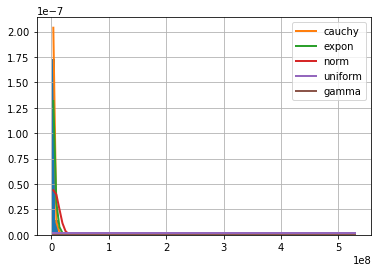

In [70]:
f = Fitter(price,
           distributions=["uniform", "expon", "norm", "gamma", "cauchy"])
f.fit()
f.summary()

In [71]:
f.get_best(method = 'sumsquare_error')

{'cauchy': {'loc': 4179335.842967552, 'scale': 829853.6254066597}}

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 12.35it/s]
weibull was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
laplace,1.434039e-15,4.409042e+04,-1.613571e+05,inf,0.064776,2.547874e-14
beta,3.439516e-15,5.221451e+04,-1.580128e+05,inf,0.110383,8.002853e-41
pareto,1.043934e-14,4.589924e+03,-1.537976e+05,inf,0.431381,0.000000e+00
lognorm,1.272209e-14,1.773173e+04,-1.530454e+05,inf,0.049617,1.407410e-08
weibull,inf,inf,inf,inf,NaN,NaN


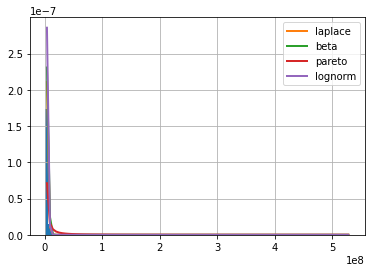

In [72]:
f = Fitter(price,
           distributions=["pareto", "laplace","lognorm", "weibull", "beta"])
f.fit()
f.summary()

In [73]:
f.get_best(method = 'sumsquare_error')

{'laplace': {'loc': 4194167.0, 'scale': 1271846.5086750789}}

Fitting 2 distributions: 100%|███████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 54.07it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,9.718521e-16,5127.834304,-162837.075533,inf,0.091052,6.809850e-28
laplace,1.434039e-15,44090.418556,-161357.142032,inf,0.064776,2.547874e-14


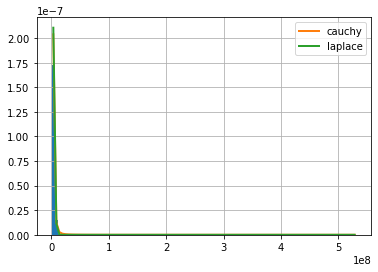

In [74]:
f = Fitter(price,
           distributions=["cauchy", "laplace"])
f.fit()
f.summary()

In [75]:
f.get_best(method = 'sumsquare_error')

{'cauchy': {'loc': 4179335.842967552, 'scale': 829853.6254066597}}

In [84]:
level = np.array(dataset[['level']])
level = level.ravel()
level_random = np.random.uniform(-0.49, 0.49, np.size(level))
level = level + level_random

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 62.49it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.010990,803.327251,-48493.795742,inf,0.054081,4.130933e-10
expon,0.018568,791.481582,-46506.815831,inf,0.080717,5.252875e-22
norm,0.038618,925.610478,-43721.277572,inf,0.093799,1.406990e-29
cauchy,0.051966,861.678276,-42592.033423,inf,0.166763,6.227055e-93
uniform,0.109620,668.638143,-39752.599421,inf,0.414297,0.000000e+00


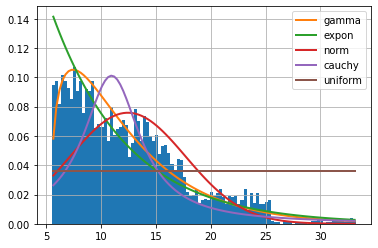

In [85]:
f = Fitter(level,
           distributions=["uniform", "expon", "norm", "gamma", "cauchy"])
f.fit()
f.summary()

In [86]:
f.get_best(method = 'sumsquare_error')

{'gamma': {'a': 1.395677154281378,
  'loc': 5.471893278871538,
  'scale': 4.995960862091133}}

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 12.64it/s]
weibull was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
laplace,1.434039e-15,4.409042e+04,-1.613571e+05,inf,0.064776,2.547874e-14
beta,3.439516e-15,5.221451e+04,-1.580128e+05,inf,0.110383,8.002853e-41
pareto,1.043934e-14,4.589924e+03,-1.537976e+05,inf,0.431381,0.000000e+00
lognorm,1.272209e-14,1.773173e+04,-1.530454e+05,inf,0.049617,1.407410e-08
weibull,inf,inf,inf,inf,NaN,NaN


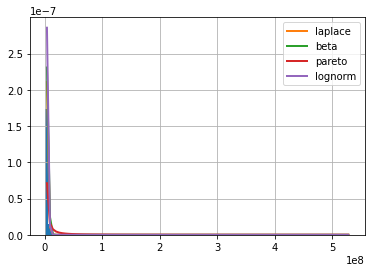

In [87]:
f = Fitter(price,
           distributions=["pareto", "laplace","lognorm", "weibull", "beta"])
f.fit()
f.summary()

In [88]:
f.get_best(method = 'sumsquare_error')

{'laplace': {'loc': 4194167.0, 'scale': 1271846.5086750789}}

Fitting 2 distributions: 100%|███████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 32.85it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
laplace,1.434039e-15,4.409042e+04,-161357.142032,inf,0.064776,2.547874e-14
gamma,3.011281e-14,inf,-149767.789222,NaN,0.999737,0.000000e+00


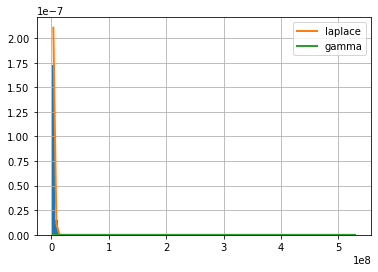

In [89]:
f = Fitter(price,
           distributions=["gamma", "laplace"])
f.fit()
f.summary()

In [83]:
f.get_best(method = 'sumsquare_error')

{'laplace': {'loc': 4194167.0, 'scale': 1271846.5086750789}}

In [90]:
levels = np.array(dataset[['levels']])
levels = levels.ravel()
levels_random = np.random.uniform(-0.49, 0.49, np.size(levels))
levels = levels + levels_random

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 40.01it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.329408,808.770568,-35558.895135,inf,0.143125,1.854462e-68
norm,0.329808,822.432880,-35562.520434,inf,0.158045,1.838945e-83
cauchy,0.338392,833.619778,-35464.788416,inf,0.162497,3.115646e-88
uniform,0.371409,701.542440,-35110.633788,inf,0.361627,0.000000e+00
expon,0.389017,768.811397,-34934.438954,inf,0.293827,1.701269e-291


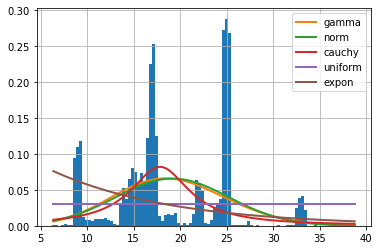

In [95]:
f = Fitter(levels,
           distributions=["uniform", "expon", "norm", "gamma", "cauchy"])
f.fit()
f.summary()

In [96]:
f.get_best(method = 'sumsquare_error')

{'gamma': {'a': 66.89763625767307,
  'loc': -30.55139966574575,
  'scale': 0.7429139609842053}}

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 20.32it/s]
weibull was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
laplace,0.322514,826.732836,-3.564760e+04,inf,0.210837,7.702727e-149
beta,0.328688,831.403442,-3.555898e+04,inf,0.120324,1.893530e-48
lognorm,0.329491,809.902745,-3.555794e+04,inf,0.144646,6.420868e-70
pareto,0.465641,842.803493,-3.424227e+04,inf,0.378440,0.000000e+00
weibull,inf,inf,inf,inf,NaN,NaN


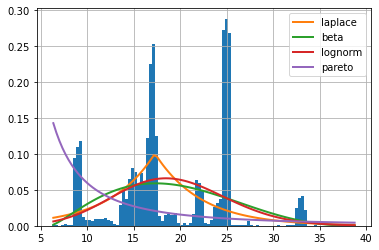

In [97]:
f = Fitter(levels,
           distributions=["pareto", "laplace","lognorm", "weibull", "beta"])
f.fit()
f.summary()

In [98]:
f.get_best(method = 'sumsquare_error')

{'laplace': {'loc': 17.28121004040578, 'scale': 4.9657547001152675}}

Fitting 2 distributions: 100%|███████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 32.81it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
laplace,1.434039e-15,4.409042e+04,-161357.142032,inf,0.064776,2.547874e-14
gamma,3.011281e-14,inf,-149767.789222,NaN,0.999737,0.000000e+00


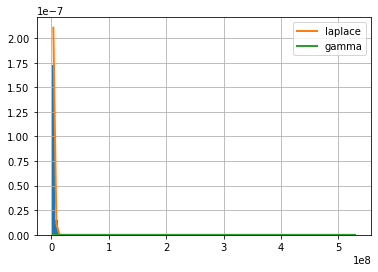

In [99]:
f = Fitter(price,
           distributions=["gamma", "laplace"])
f.fit()
f.summary()

In [100]:
f.get_best(method = 'sumsquare_error')

{'laplace': {'loc': 4194167.0, 'scale': 1271846.5086750789}}

In [27]:
dataset = pd.read_csv('1moskow_2-3_rooms_upper_floors(6+)_Pannel.csv')
print(dataset.head)

<bound method NDFrame.head of            price        date      time    geo_lat    geo_lon  region  \
0        2800000  2018-03-06  09:57:10  55.736972  38.846457      81   
1        6909880  2018-03-06  18:34:48  55.913950  37.707712      81   
2        6675840  2018-03-06  18:37:28  55.913950  37.707712      81   
3        6522650  2018-03-06  18:37:40  55.913950  37.707712      81   
4       11500000  2018-04-03  17:40:53  55.798921  37.738090       3   
...          ...         ...       ...        ...        ...     ...   
102776  10300000  2021-05-01  19:14:46  55.760172  37.828976       3   
102777   3500000  2021-05-01  19:44:05  55.780724  38.659698      81   
102778  18500000  2021-05-01  20:01:47  55.741926  37.674274       3   
102779  11354820  2021-05-01  20:11:29  55.619589  37.417212       3   
102780  11831910  2021-05-01  20:14:12  55.804736  37.750898       3   

        building_type  level  levels  rooms  area  kitchen_area  object_type  
0                   1     

In [43]:
dataset = pd.read_csv('1moskow_studio_rooms_fist_floors(1-3)_Pannel.csv')
print(dataset.head)

<bound method NDFrame.head of          price        date      time    geo_lat    geo_lon  region  \
0      3950000  2018-09-09  21:19:07  55.805138  37.843009      81   
1      2550000  2018-09-10  08:28:12  55.683630  37.925398       3   
2      2800000  2018-09-10  08:33:08  55.604821  37.555866       3   
3      6500000  2018-09-10  11:10:53  55.529556  37.445694       3   
4      2850000  2018-09-11  11:10:46  55.705515  37.920717       3   
...        ...         ...       ...        ...        ...     ...   
11981  2700000  2021-05-01  16:32:56  55.613884  37.599770       3   
11982  2400000  2021-05-01  17:02:44  55.776659  37.823026       3   
11983  3800000  2021-05-01  17:41:43  55.619362  37.604200       3   
11984  3650000  2021-05-01  18:46:39  55.615048  37.751721       3   
11985  3750000  2021-05-01  20:13:40  55.808892  37.404213       3   

       building_type  level  levels  rooms  area  kitchen_area  object_type  
0                  1      3      22     -1  32.0   

In [50]:
dataset = pd.read_csv('1moskow_studio_rooms_upper_floors(6+)_Monolithic.csv')
print(dataset.head)

<bound method NDFrame.head of           price        date      time    geo_lat    geo_lon  region  \
0       4990050  2018-09-08  00:40:46  55.673715  37.745559       3   
1       3600000  2018-09-08  10:10:59  55.797893  37.964169      81   
2       4152840  2018-09-08  12:37:01  55.586270  37.457684       3   
3       4150000  2018-09-08  13:50:36  54.881772  38.055668      81   
4      15500000  2018-09-08  16:49:40  55.733440  37.427094       3   
...         ...         ...       ...        ...        ...     ...   
10822   9650000  2021-05-01  19:13:41  55.752833  37.520450       3   
10823   5280000  2021-05-01  19:22:42  55.882031  37.501837       3   
10824  13600000  2021-05-01  19:36:41  55.925338  37.598832      81   
10825   6350000  2021-05-01  19:51:41  55.816520  37.342661      81   
10826   4339000  2021-05-01  20:08:39  55.700399  37.960624      81   

       building_type  level  levels  rooms  area  kitchen_area  object_type  
0                  2      8      15    

In [16]:
price = dataset['price']. tolist ()
area = dataset['area']. tolist ()
sq_metars = np.arange(np.size(area), dtype=np.double)
for i in range(np.size(area)):
    sq_metars[i] = price[i]/area[i]

In [26]:
x = np.sort(sq_metars)
y = np.arange(1, np.size(x)+1)
x_norm = np.linspace(min(sq_metars), max(sq_metars), np.size(sq_metars))
y_norm = norm.cdf(x_norm, 0, 1.87)

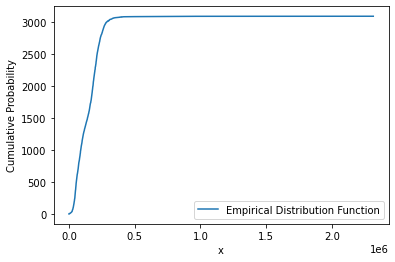

In [27]:
fig, ax = plt.subplots()
ax.plot(x, y, label='Empirical Distribution Function')
# ax.plot(x_norm, y_norm, 'k--', label='Normal Distribution')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('Cumulative Probability')
plt.show()